In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib.pylab import rcParams

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

read in dataset with filled values

In [ ]:
url = "streamflow_filled_ARIMA.csv"
df = pd.read_csv(url)

check for duplicate rows


In [ ]:
print('are there duplicate rows: ', end = ' ')
duplicates = df.duplicated().any()
print(duplicates)

are there duplicate rows:  False


there are no duplicate rows, we don't have to worry about this task

check for outliers

<Axes: >

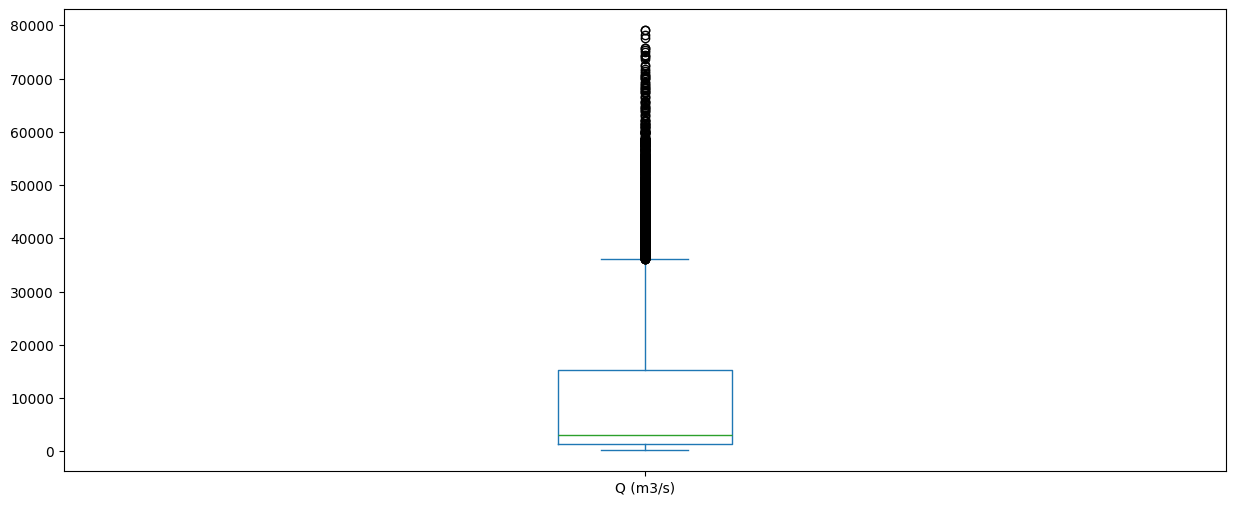

In [ ]:
df['Q (m3/s)'].plot.box()

<Axes: ylabel='Frequency'>

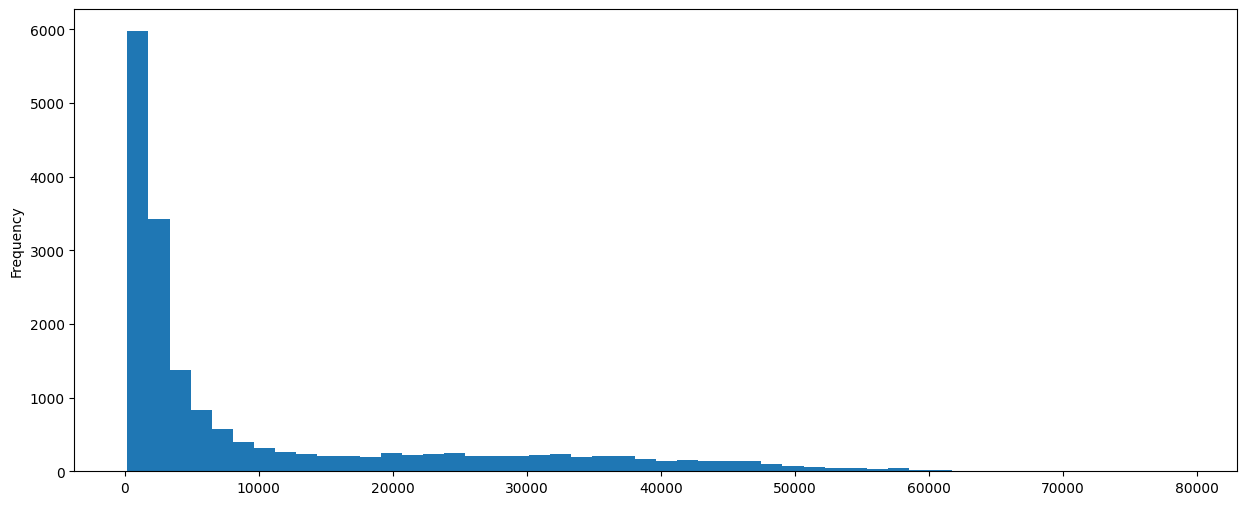

In [ ]:
df['Q (m3/s)'].plot.hist(bins=50)

a significant amount of outliers are in the data

create a dataframe with only outliers

In [ ]:
Q1 = df['Q (m3/s)'].quantile(0.25)
Q3 = df['Q (m3/s)'].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df['Q (m3/s)'] < (Q1 - 1.5 * IQR)) | (df['Q (m3/s)'] > (Q3 + 1.5 * IQR)))

outliers_df = df[outliers]

print(outliers_df)

13881.0
       Unnamed: 0  Year  Month  Day        Date  Q (m3/s)
227         12190  1967      8   16  1967-08-16  36500.00
228         12191  1967      8   17  1967-08-17  36500.00
239         12202  1967      8   28  1967-08-28  37100.00
240         12203  1967      8   29  1967-08-29  39900.00
241         12204  1967      8   30  1967-08-30  41300.00
242         12205  1967      8   31  1967-08-31  42000.00
243         12206  1967      9    1  1967-09-01  42700.00
244         12207  1967      9    2  1967-09-02  42700.00
245         12208  1967      9    3  1967-09-03  42700.00
246         12209  1967      9    4  1967-09-04  42700.00
247         12210  1967      9    5  1967-09-05  41300.00
248         12211  1967      9    6  1967-09-06  40600.00
249         12212  1967      9    7  1967-09-07  39900.00
250         12213  1967      9    8  1967-09-08  39900.00
251         12214  1967      9    9  1967-09-09  40600.00
252         12215  1967      9   10  1967-09-10  41300.00
253   

it appears that all the outliers occur during the same period of time each year (july-october) indicating a useful pattern, I don't beleive they need to be changed since we want to predict flooding events and this period has the highest volumetric flow rates
